In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

x_test = x_test / 255.0
x_train = x_train / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train = tf.keras.utils.to_categorical(y_train, 10)

learning_rate = 0.001
batch_size = 128
training_epochs = 12

(60000, 28, 28)


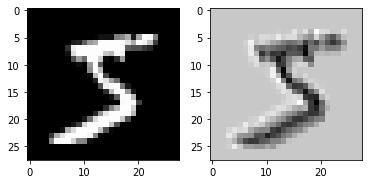

In [ ]:
tf. model = tf.keras.Sequential()

#L1
image = tf.cast(image, dtype=tf.float32)

tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu',padding='SAME'))

layer = tf.keras.layers.Conv2D(3, 3, strides=(1), padding ='SAME')
output = layer(image)

plt.subplot(121)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(122)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

drop_rate = 0.5

tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
tf.model.add(tf.keras.layers.Dropout(drop_rate))

In [ ]:
#L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='SAME'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
tf.model.add(tf.keras.layers.Dropout(drop_rate))

In [ ]:
tf.model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='SAME'))
tf.model.add(tf.keras.layers.MaxPool2D(pool_size= (2,2)))
tf.model.add(tf.keras.layers.Dropout(drop_rate))

In [ ]:
#L3
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=576, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))

In [ ]:
tf.model.add(tf.keras.layers.Dense(units=10, input_dim =576, kernel_initializer='glorot_normal', activation='softmax'))

In [ ]:
tf.model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
tf.model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/12
469/469 [==============================] - 49s 104ms/step - loss: 0.8252 - accuracy: 0.7250
Epoch 2/12
469/469 [==============================] - 48s 103ms/step - loss: 0.5365 - accuracy: 0.8358
Epoch 3/12
469/469 [==============================] - 48s 103ms/step - loss: 0.5163 - accuracy: 0.8446
Epoch 4/12
469/469 [==============================] - 48s 103ms/step - loss: 0.5152 - accuracy: 0.8467
Epoch 5/12
469/469 [==============================] - 49s 104ms/step - loss: 0.5314 - accuracy: 0.8432
Epoch 6/12
469/469 [==============================] - 48s 103ms/step - loss: 0.5013 - accuracy: 0.8530
Epoch 7/12
469/469 [==============================] - 49s 103ms/step - loss: 0.5082 - accuracy: 0.8536
Epoch 8/12
469/469 [==============================] - 48s 103ms/step - loss: 0.5175 - accuracy: 0.8496
Epoch 9/12
469/469 [==============================] - 49s 104ms/step - loss: 0.5175 - accuracy: 0.8507
Epoch 10/12
469/469 [==============================] - 48s 103ms/step - l

In [ ]:
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

index:  4411 actual y:  8 predicted y:  8
index:  5227 actual y:  1 predicted y:  1
index:  5513 actual y:  0 predicted y:  0
index:  8310 actual y:  2 predicted y:  2
index:  1151 actual y:  6 predicted y:  6
index:  9749 actual y:  5 predicted y:  5
index:  2403 actual y:  0 predicted y:  0
index:  1402 actual y:  2 predicted y:  2
index:  7077 actual y:  5 predicted y:  5
index:  9054 actual y:  9 predicted y:  9
313/313 [==============================] - 4s 12ms/step - loss: 0.0799 - accuracy: 0.9803
loss:  0.079923614859581
accuracy 0.9803000092506409
